In [2]:
# https://github.com/Rishikumar04/Data-Science-Training/blob/main/Classification%20Problems/02-Employee%20Attrition.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
import warnings
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('../../data/datasets/HR-Employee-Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df['Age'].nunique()

43

In [6]:
df['Age'].value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

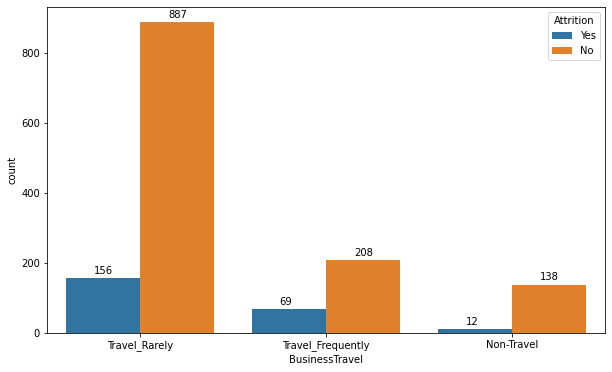

In [7]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['BusinessTravel'], hue = df['Attrition'])

for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+13))

In [8]:
df['DailyRate'].value_counts()

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64

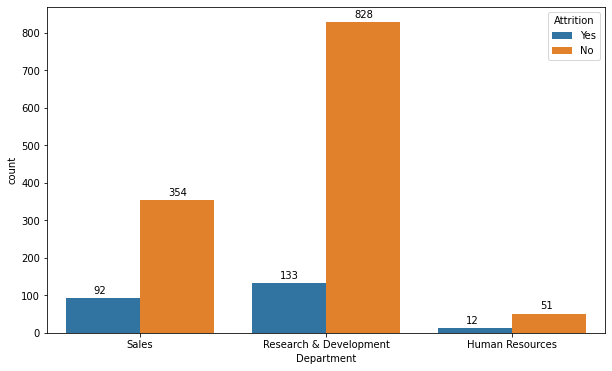

In [9]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['Department'], hue = df['Attrition'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+13))

In [10]:
df['DistanceFromHome'].value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

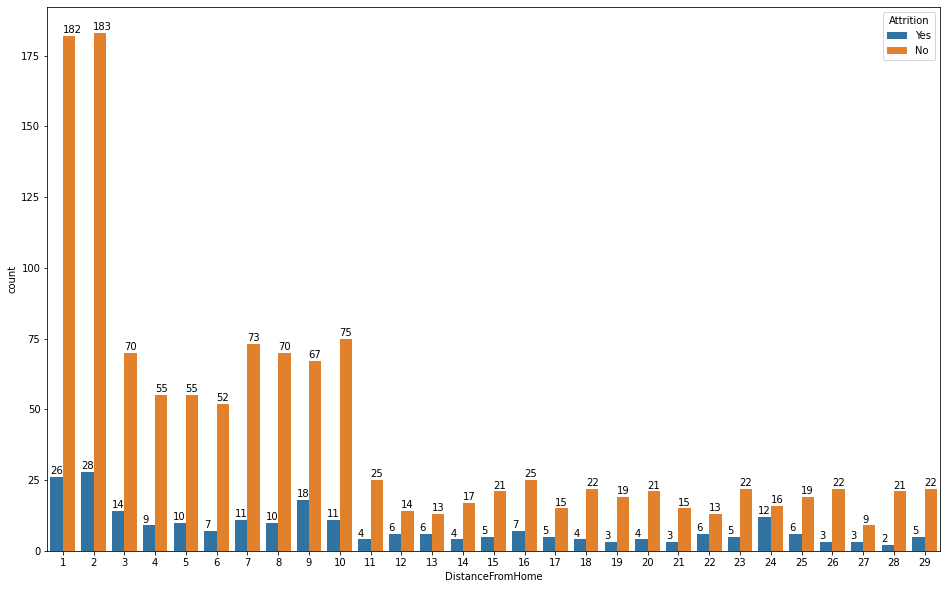

In [11]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['DistanceFromHome'], hue = df['Attrition'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()-0.01, p.get_height()+1))

In [12]:
df.groupby(['JobRole', 'Attrition']).agg({'DistanceFromHome':np.mean})

DistanceFromHome
JobRole                   Attrition                  
Healthcare Representative No                 9.204918
                          Yes               17.666667
Human Resources           No                 6.600000
                          Yes               13.416667
Laboratory Technician     No                 9.329949
                          Yes                9.661290
Manager                   No                 7.927835
                          Yes               10.000000
Manufacturing Director    No                 9.533333
                          Yes                8.800000
Research Director         No                 8.474359
                          Yes                7.000000
Research Scientist        No                 8.869388
                          Yes                9.765957
Sales Executive           No                 9.026022
                          Yes               12.649123
Sales Representative      No                 9.000000
                          Yes                8.151515

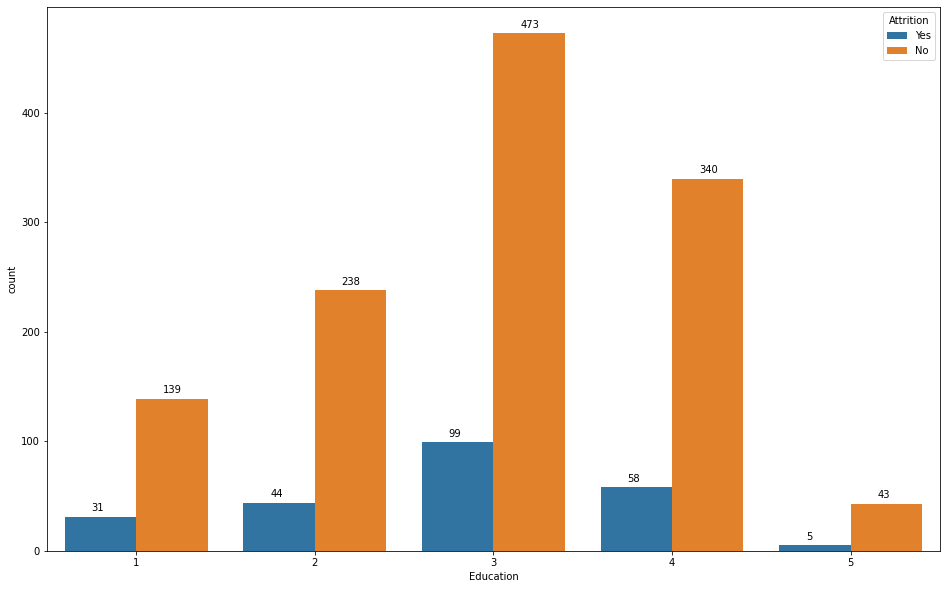

In [13]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['Education'], hue = df['Attrition'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))

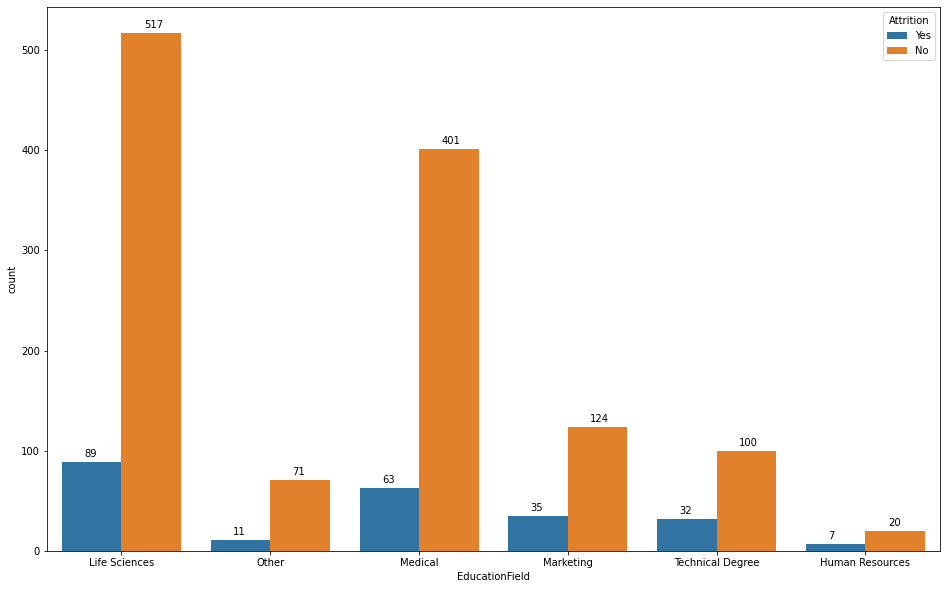

In [14]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['EducationField'], hue = df['Attrition'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))

In [15]:
df['EmployeeCount'].value_counts()
#Employee count column has only one value in all rows, so probably we can drop this column

1    1470
Name: EmployeeCount, dtype: int64

In [16]:
df['EmployeeNumber'].nunique()
#Each row of Employee Number column has unique value. 

1470

In [17]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

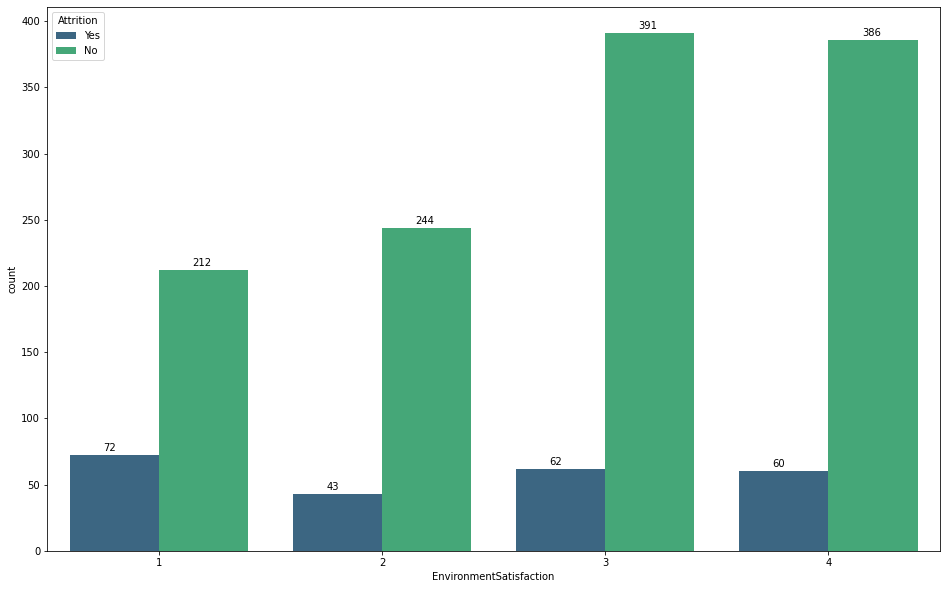

In [18]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['EnvironmentSatisfaction'], hue = df['Attrition'], palette='viridis')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+3))

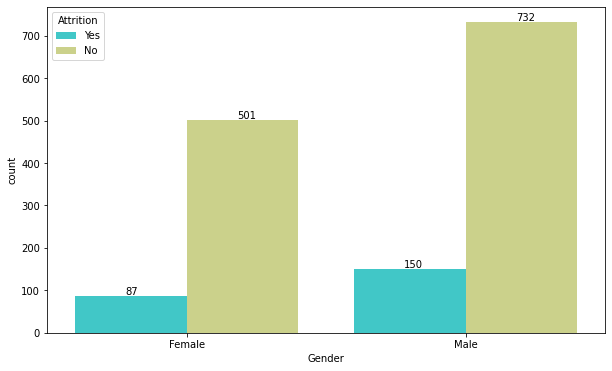

In [19]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['Gender'], hue = df['Attrition'], palette='rainbow')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.18, p.get_height()+3))

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

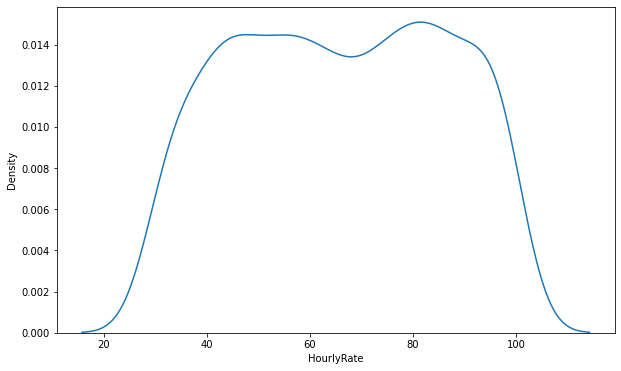

In [20]:
plt.figure(figsize=(10,6))
sns.kdeplot(x = df['HourlyRate']) 

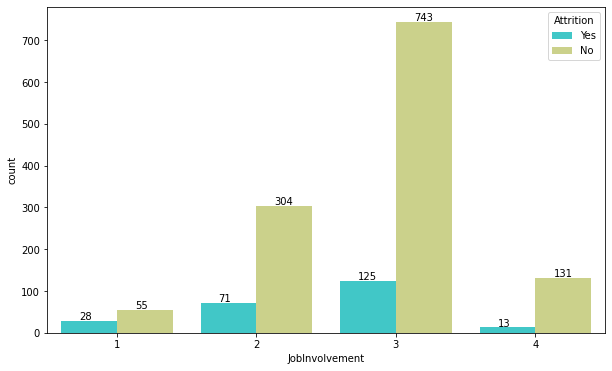

In [21]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['JobInvolvement'], hue = df['Attrition'], palette='rainbow')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+3))

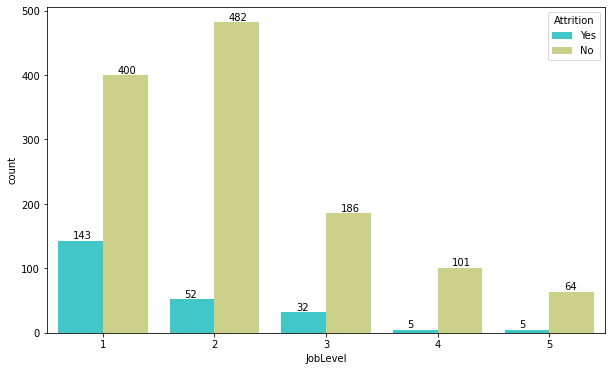

In [22]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['JobLevel'], hue = df['Attrition'], palette='rainbow')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+3))

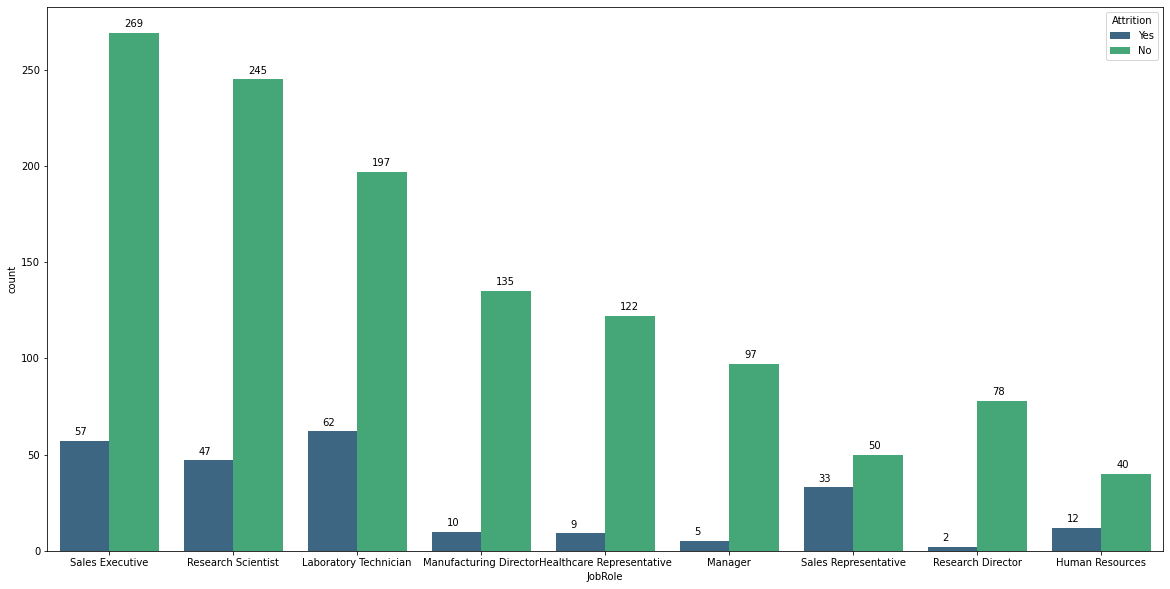

In [23]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = df['JobRole'], hue = df['Attrition'], palette='viridis')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+3))

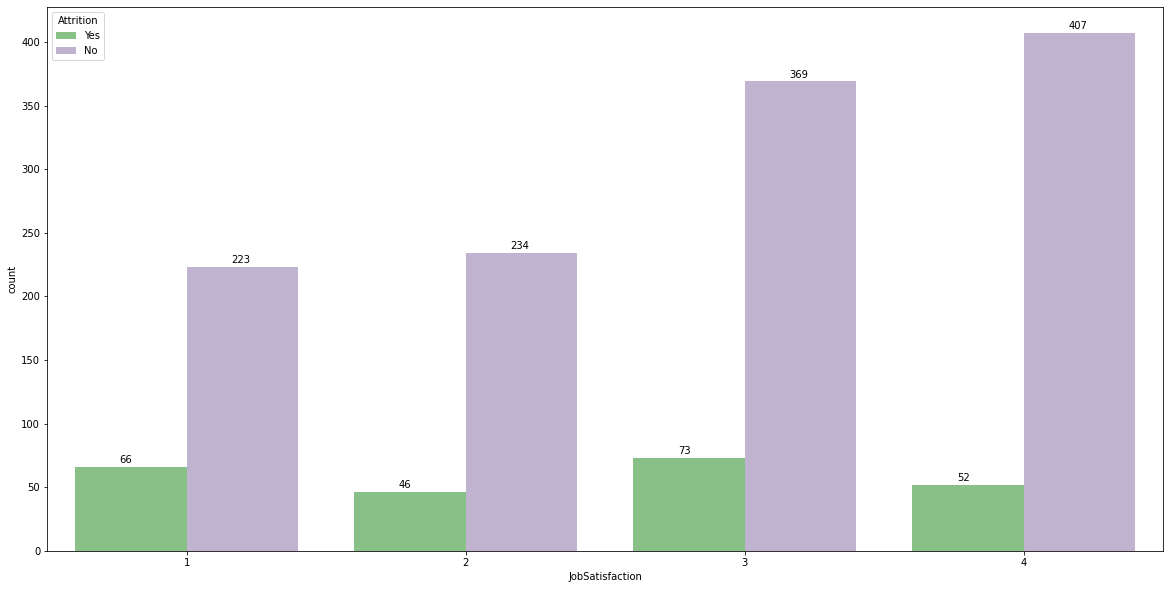

In [24]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = df['JobSatisfaction'], hue = df['Attrition'], palette='Accent')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.16, p.get_height()+3))

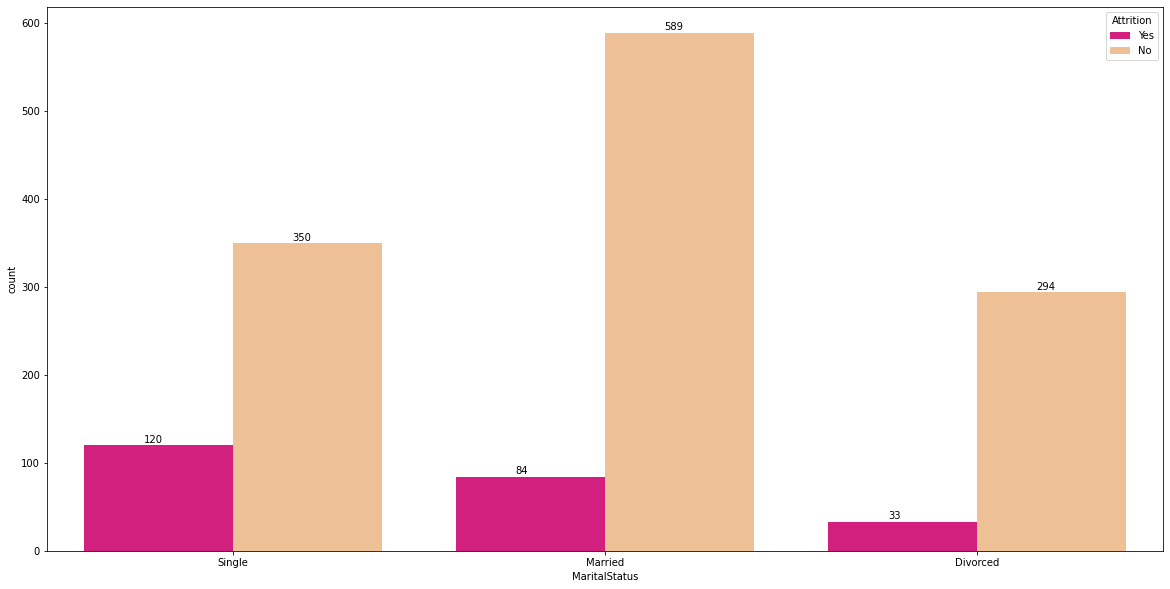

In [25]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = df['MaritalStatus'], hue = df['Attrition'], palette='Accent_r')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.16, p.get_height()+3))

In [26]:
df['MonthlyIncome'].nunique()

1349

In [27]:
df['MonthlyRate'].nunique()

1427

<AxesSubplot:xlabel='MonthlyIncome', ylabel='MonthlyRate'>

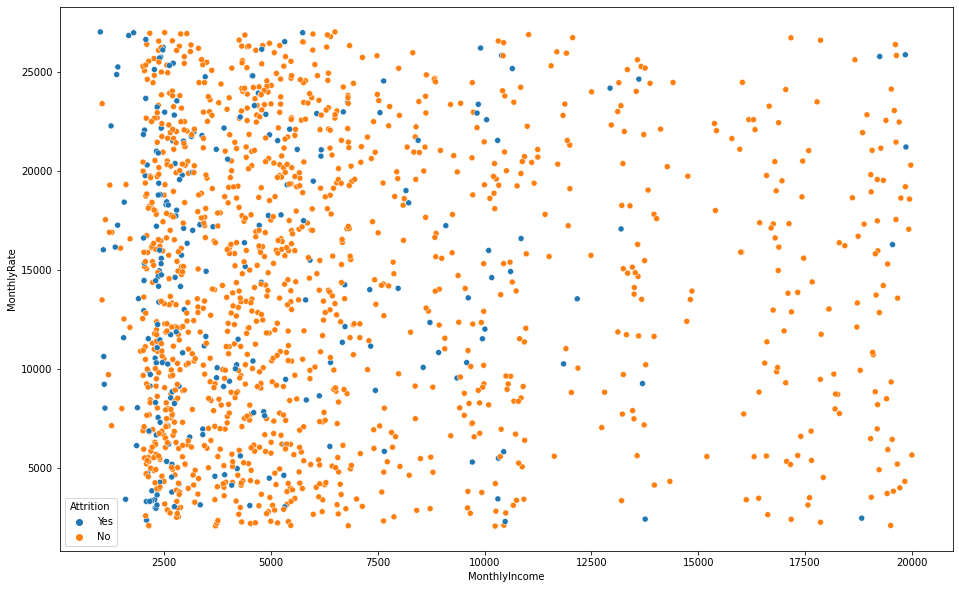

In [28]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = df['MonthlyIncome'], y = df['MonthlyRate'], hue = df['Attrition'])

In [29]:
df.groupby(['Education', 'Attrition']).agg({'MonthlyIncome':np.mean})

MonthlyIncome
Education Attrition               
1         No           5926.129496
          Yes          4360.161290
2         No           6586.058824
          Yes          4282.545455
3         No           6882.919662
          Yes          4770.242424
4         No           7087.814706
          Yes          5335.155172
5         No           8559.906977
          Yes          5850.200000

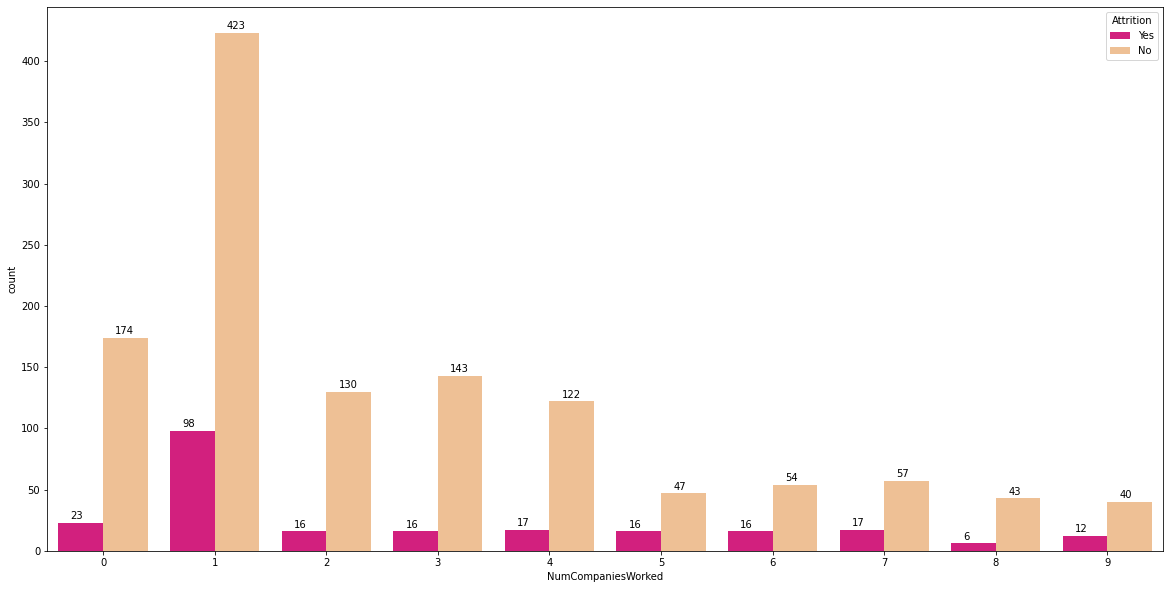

In [30]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = df['NumCompaniesWorked'], hue = df['Attrition'], palette='Accent_r')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.11, p.get_height()+3))

In [31]:
df['Over18'].nunique()
#This column has only one unique column, so we can drop this column

1

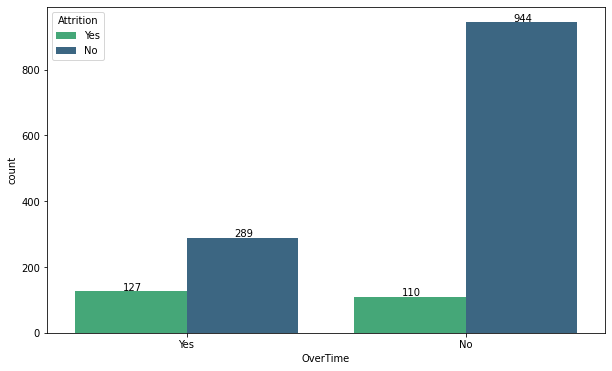

In [32]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['OverTime'], hue = df['Attrition'], palette='viridis_r')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.17, p.get_height()+3))

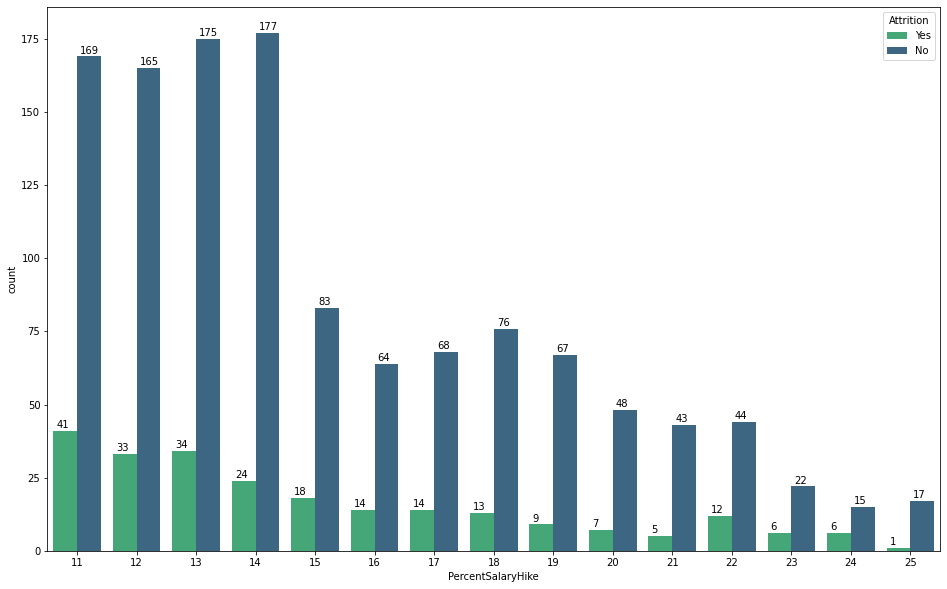

In [33]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['PercentSalaryHike'], hue = df['Attrition'], palette='viridis_r')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1))

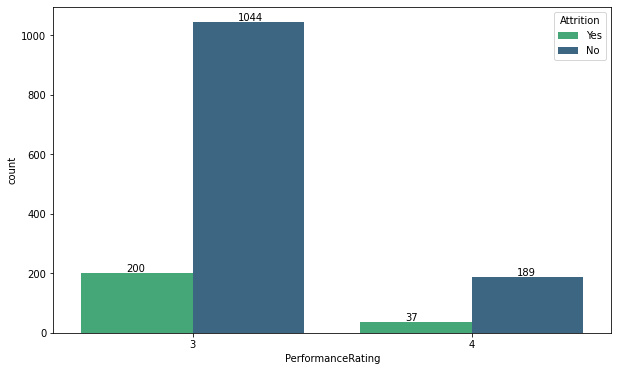

In [34]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['PerformanceRating'], hue = df['Attrition'], palette='viridis_r')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.16, p.get_height()+5))

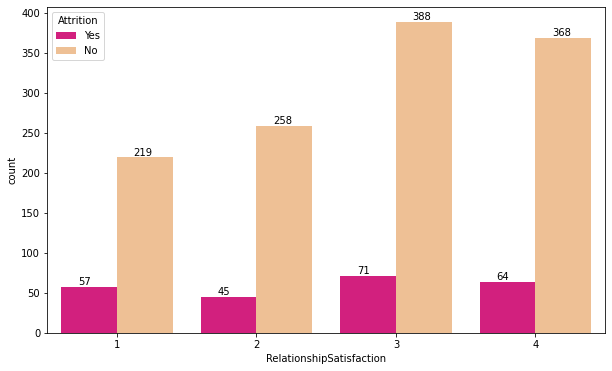

In [35]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['RelationshipSatisfaction'], hue = df['Attrition'], palette='Accent_r')

for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+3))

In [36]:

df['StandardHours'].nunique()
#Standard Hours column has only one unique value, so we can drop that column

1

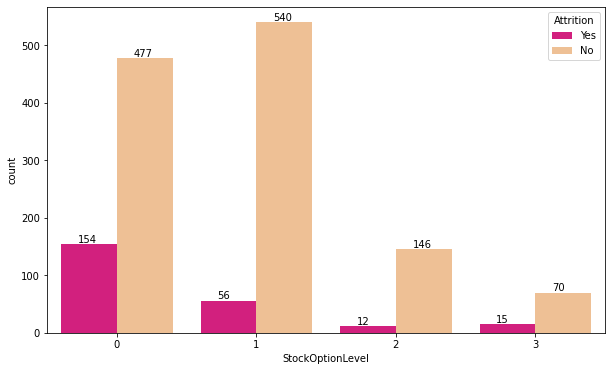

In [37]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['StockOptionLevel'], hue = df['Attrition'], palette='Accent_r')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+3))

In [38]:
def value(col):
    plt.figure(figsize = (16,10))
    ax = sns.countplot(x = df[col], hue = df['Attrition'], palette='Accent_r')
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.1, p.get_height()+2))
    plt.tight_layout()
    plt.show()

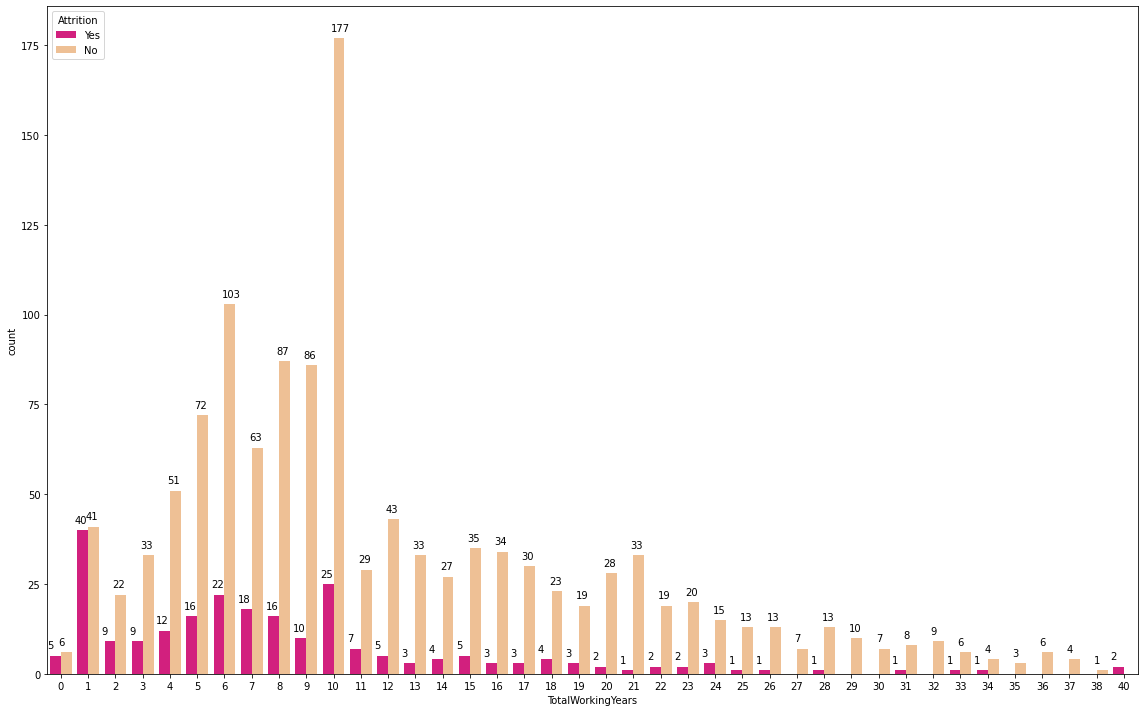

In [39]:
value('TotalWorkingYears')

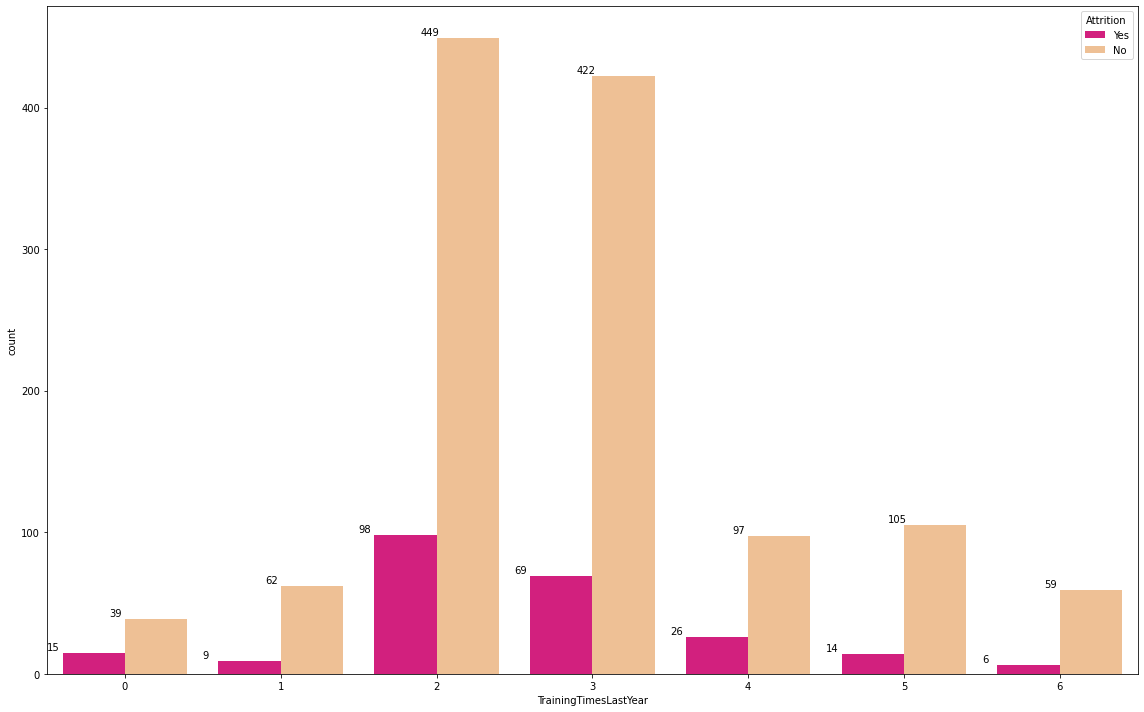

In [40]:
value('TrainingTimesLastYear')

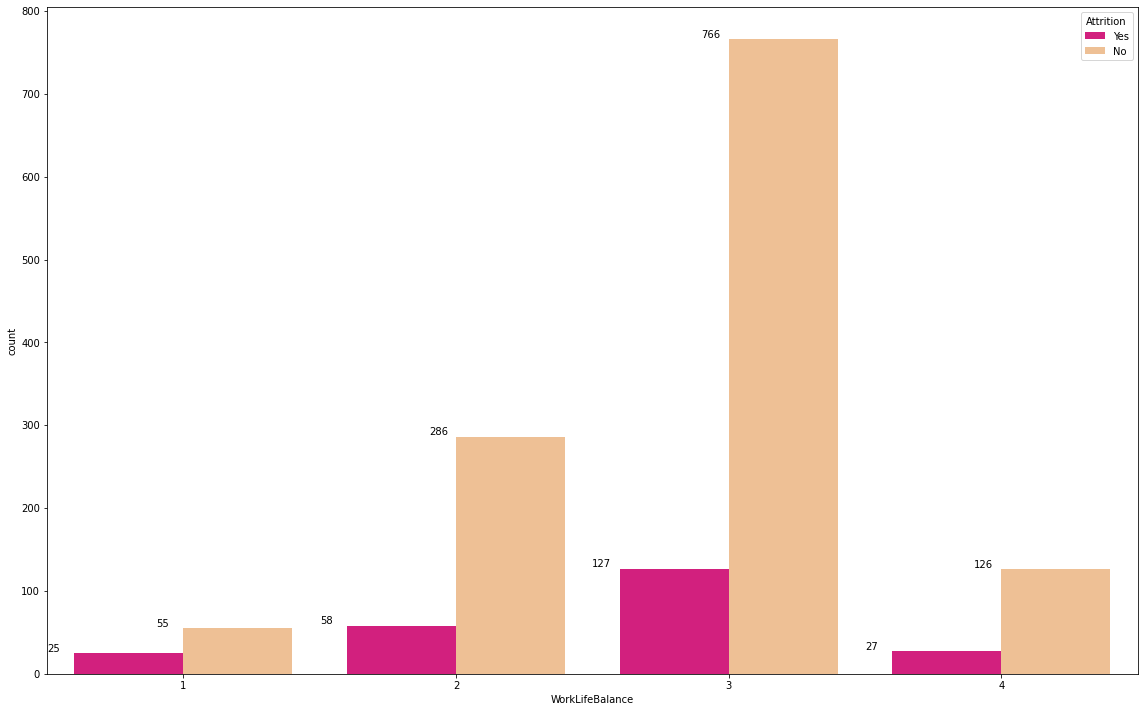

In [41]:
value('WorkLifeBalance')

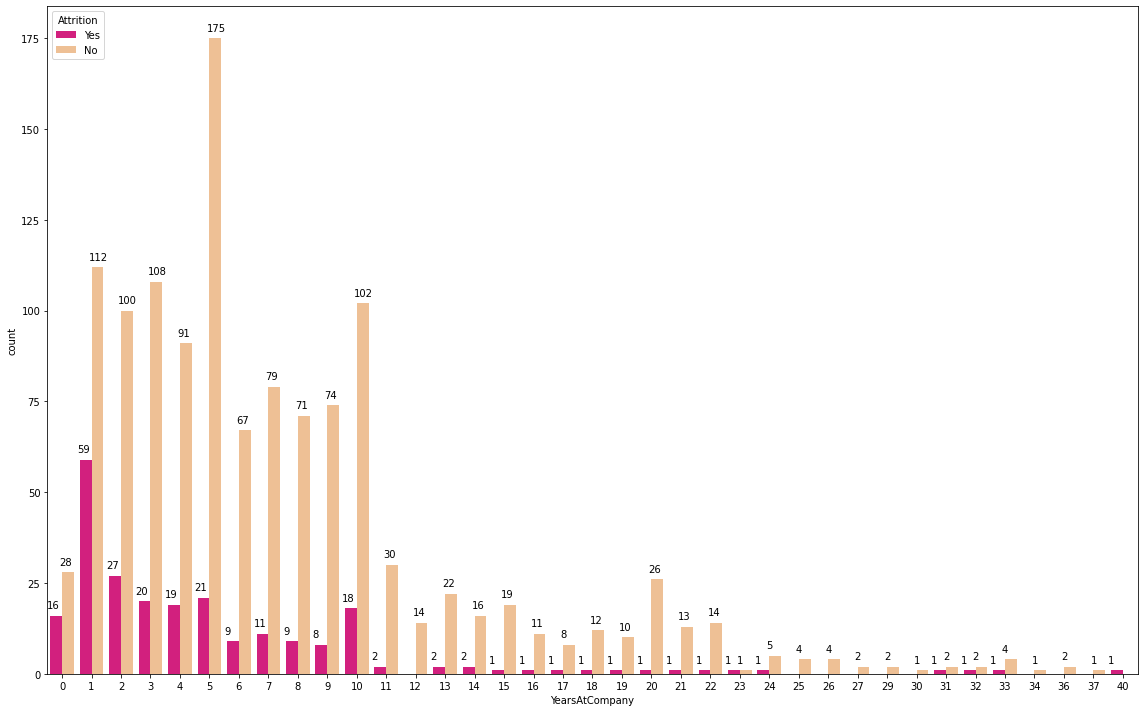

In [42]:
value('YearsAtCompany')

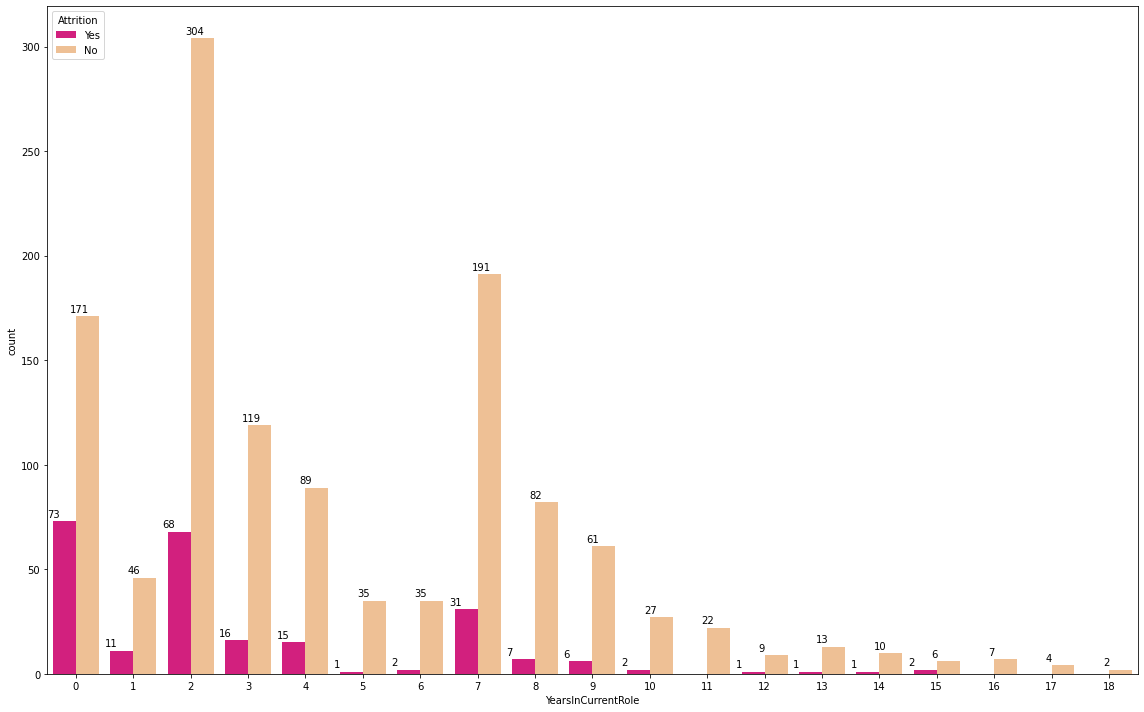

In [43]:
value('YearsInCurrentRole')

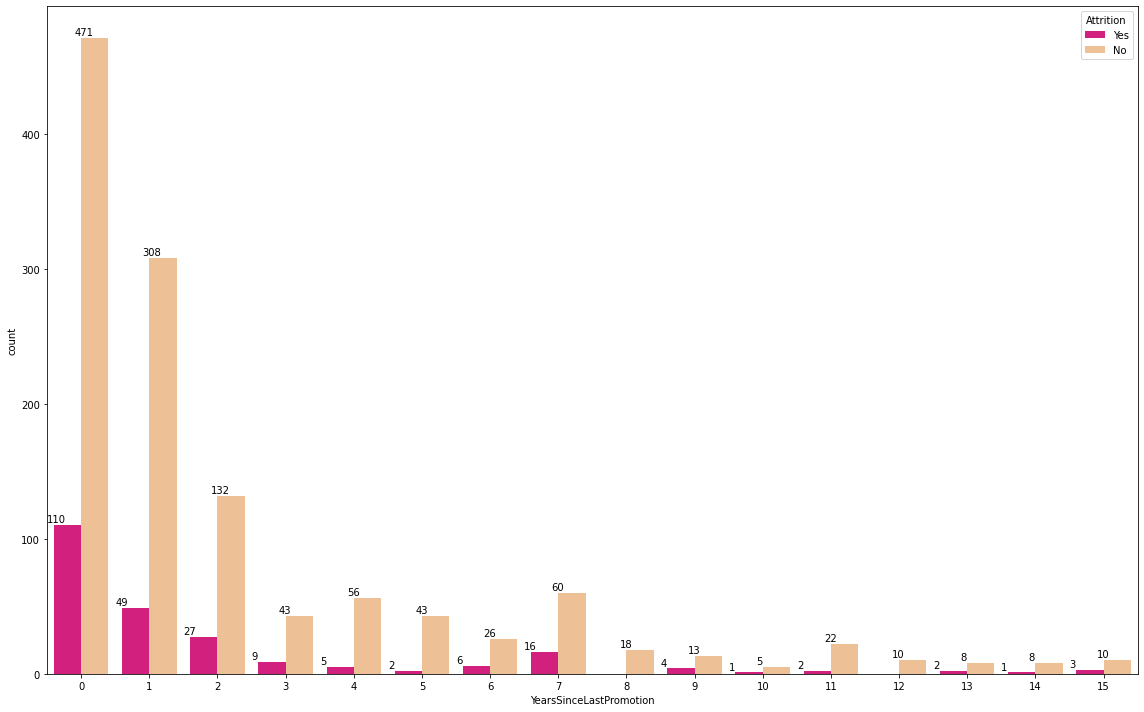

In [44]:
value('YearsSinceLastPromotion')

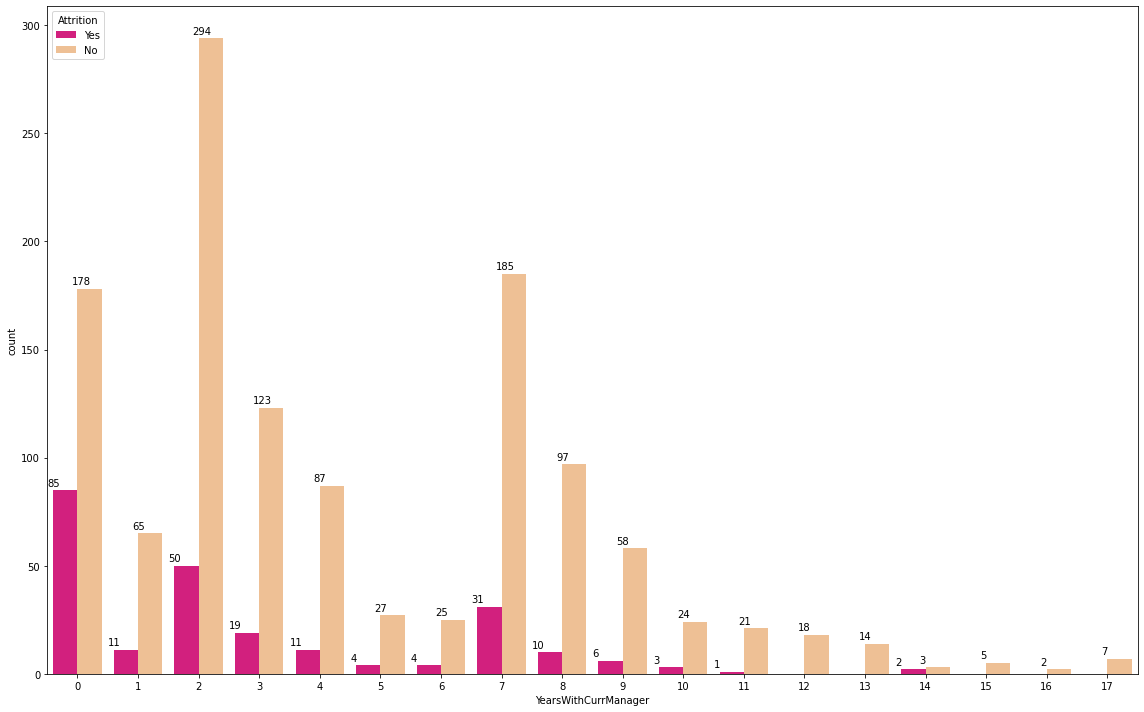

In [45]:
value('YearsWithCurrManager')

In [46]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [47]:
df['MonthlyIncome'].nunique()

1349

In [48]:
final_df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis =1)

In [49]:
final_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [50]:
cat_columns = final_df.select_dtypes(exclude = np.number).columns
cat_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [51]:
encode_df  = pd.DataFrame(index=final_df.index)

In [52]:
encode_df = pd.get_dummies(final_df[cat_columns[1:]])

In [53]:
encode_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [54]:
final_df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], axis = 1, inplace = True)

In [55]:
final_concat_df = pd.concat([final_df,encode_df], axis =1)

In [56]:
X = final_concat_df.drop('Attrition', axis =1)
y = final_concat_df['Attrition']

In [57]:
# Scaling
sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X_scaled

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-0.3371,-0.481859,0.639841,-0.211604,-1.374051,1.515244,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.224745,-1.224745,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.224745,-1.224745,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-1.591746,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.835451,-0.284329,0.523316,0.489376,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873,-0.3371,2.075297,-1.562889,-0.211604,0.72

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

In [59]:
y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [60]:
# Logistic Regression
lg = LogisticRegression(penalty='l2', class_weight={'Yes':0.3, 'No':0.7})
lg.fit(X_train, y_train)

LogisticRegression(class_weight={'No': 0.7, 'Yes': 0.3})

In [61]:
train_pred = lg.predict(X_train)
test_pred  = lg.predict(X_test)

In [62]:
#train_data
def metrics(y_true,y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))

In [63]:
print('Train Metrics')
metrics(y_train, train_pred)

Train Metrics
Confusion Matrix:
 [[843   6]
 [135  45]]


Accuracy Score:
 0.8629737609329446


Classification Report: 
               precision    recall  f1-score   support

          No       0.86      0.99      0.92       849
         Yes       0.88      0.25      0.39       180

    accuracy                           0.86      1029
   macro avg       0.87      0.62      0.66      1029
weighted avg       0.87      0.86      0.83      1029



In [64]:
print('Test Metrics')
metrics(y_test, test_pred)

Test Metrics
Confusion Matrix:
 [[382   2]
 [ 35  22]]


Accuracy Score:
 0.9160997732426304


Classification Report: 
               precision    recall  f1-score   support

          No       0.92      0.99      0.95       384
         Yes       0.92      0.39      0.54        57

    accuracy                           0.92       441
   macro avg       0.92      0.69      0.75       441
weighted avg       0.92      0.92      0.90       441



In [66]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7,n_jobs=-8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-8, n_neighbors=7)

In [67]:
train_pred_knn = knn.predict(X_train)
test_pred_knn  = knn.predict(X_test)

In [68]:
print('Train Metrics')
metrics(y_train, train_pred_knn)

Train Metrics
Confusion Matrix:
 [[843   6]
 [137  43]]


Accuracy Score:
 0.8610301263362488


Classification Report: 
               precision    recall  f1-score   support

          No       0.86      0.99      0.92       849
         Yes       0.88      0.24      0.38       180

    accuracy                           0.86      1029
   macro avg       0.87      0.62      0.65      1029
weighted avg       0.86      0.86      0.83      1029



In [69]:
print('Test Metrics')
metrics(y_test, test_pred_knn)

Test Metrics
Confusion Matrix:
 [[378   6]
 [ 48   9]]


Accuracy Score:
 0.8775510204081632


Classification Report: 
               precision    recall  f1-score   support

          No       0.89      0.98      0.93       384
         Yes       0.60      0.16      0.25        57

    accuracy                           0.88       441
   macro avg       0.74      0.57      0.59       441
weighted avg       0.85      0.88      0.85       441



In [70]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

gb = GaussianNB()
gb.fit(X_train, y_train)

GaussianNB()

In [71]:
train_pred_gb = gb.predict(X_train)
test_pred_gb  = gb.predict(X_test)

In [72]:
print('Train Metrics')
metrics(y_train, train_pred_gb)

Train Metrics
Confusion Matrix:
 [[576 273]
 [ 41 139]]


Accuracy Score:
 0.6948493683187561


Classification Report: 
               precision    recall  f1-score   support

          No       0.93      0.68      0.79       849
         Yes       0.34      0.77      0.47       180

    accuracy                           0.69      1029
   macro avg       0.64      0.73      0.63      1029
weighted avg       0.83      0.69      0.73      1029



In [73]:
print('Test Metrics')
metrics(y_test, test_pred_gb)

Test Metrics
Confusion Matrix:
 [[279 105]
 [ 12  45]]


Accuracy Score:
 0.7346938775510204


Classification Report: 
               precision    recall  f1-score   support

          No       0.96      0.73      0.83       384
         Yes       0.30      0.79      0.43        57

    accuracy                           0.73       441
   macro avg       0.63      0.76      0.63       441
weighted avg       0.87      0.73      0.78       441

